# CoAx: Collaborative Action Dataset for Human Motion Forecasting in an Industrial Workspace

    Purpose of the notebook: Demonstration of the CoAx dataset and utility functions to work with it

Author: Dimitrios Lagamtzis

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from IPython.display import clear_output
import os,glob,sys,time

In [3]:
import src.coax_tools.utils as coax

In [4]:
import numpy
import cv2
import matplotlib
from matplotlib import pyplot as plt

## Set Paths to the dataset and its subdirectories

In [5]:
dataset_path = '../data/'

img_path = dataset_path + 'image_data/'

dpth_img_path = dataset_path + 'depth_image_data/'

derived_data_path = dataset_path + 'derived_data/'

camera_params_path = dataset_path + 'camera_params/camera_params.json'

calib_params_path = dataset_path + 'camera_params/calib_params.yaml'

## Specify the task sequence you want to examine

In [6]:
subject = 2; task = 1; take = 1;

In [7]:
identifier = coax.get_sequence_identifier(subject=subject, task=task, take=take)

identifier

'subject_2/task_1/take_1/'

## Get Camera Parameters
    i.e. Extrinsics and Intrinsics

In [8]:
camParams = coax.get_camera_information(cam_param_path=camera_params_path , calib_param_path=calib_params_path)

## Get `images` and `depth images` for selected `identifier` sequence
    
**it is important to set `flags=-1`, when reading in the `depth images` with `cv2.imread(file,flags=-1)`**

In [9]:
images = [cv2.imread(file) for file in sorted(glob.glob(img_path+identifier+"*.png"))]
depth_images = [cv2.imread(file,flags=-1) for file in sorted(glob.glob(dpth_img_path+identifier+"*.png"))]

### Plot `rgb` and `depth` image

In [10]:
frame_id = 70

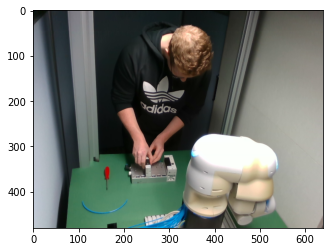

In [11]:
plt.imshow(cv2.cvtColor(images[frame_id], cv2.COLOR_BGR2RGB ));

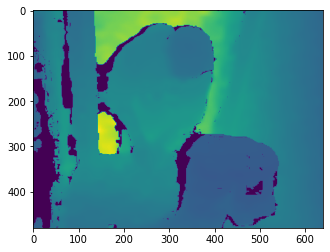

In [12]:
plt.imshow(depth_images[frame_id]);

## Choose which`frame` you want to investigate closer or loop over all frames

In [13]:
frame_id = 70

In [14]:
rgbxyz = coax.get_rgb_xyz_for_frame(frame=frame_id,
                                    images=images,
                                    depth_images=depth_images,
                                    camParams=camParams)

## Derived Data Handling

### Get 3D Bounding Boxes of every object for every frame
    - Get processed dataframes for every frame
    - Plot Pointcloud with 3D Object Bounding Boxes and center points

In [15]:
dfs_3d, obj_dfs_3d = coax.get_3d_processed_dfs_per_frame(derived_data_path=derived_data_path, identifier=identifier)

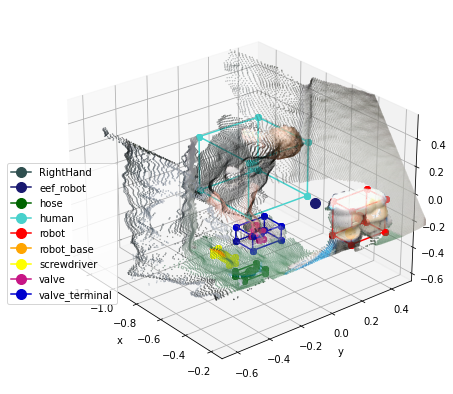

In [16]:
%matplotlib inline
coax.plot_rgbxyz_with_bounding_boxes(frame=frame_id,
                                     rgbxyz=rgbxyz,
                                     obj_dfs=obj_dfs_3d,
                                     save=False)

### Get 2D Bounding Boxes of every object for every frame
    - Get processed dataframes for every frame
    - Plot Pixel-Image with 2D Object Bounding Boxes and center points

In [17]:
dfs_2d, obj_dfs_2d = coax.get_2d_processed_dfs_per_frame(derived_data_path=derived_data_path, identifier=identifier)

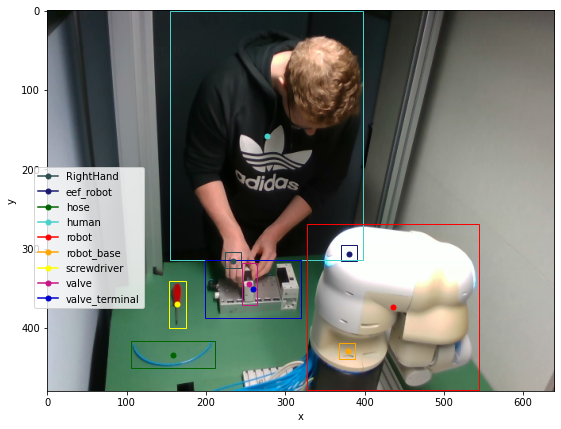

In [18]:
%matplotlib inline
coax.plot_rgb_with_bounding_boxes(frame=frame_id,
                                  images=images,
                                  obj_dfs=obj_dfs_2d,
                                  save=False)